# Modelos No Supervisados

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [31]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [70]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k,init='random').fit(X_train)
y_pred = kmeans.predict(X_test)

In [71]:
import pandas as pd

pd.crosstab(y_test,y_pred,rownames=['true values'],colnames=['cluster values'])

cluster values,0,1,2
true values,,,
0,16,0,0
1,0,18,0
2,0,4,7


In [72]:
from scipy.optimize import linear_sum_assignment

cost = -1.0*pd.crosstab(y_test,y_pred)
row_ind, col_ind = linear_sum_assignment(cost)

for i,j in enumerate(col_ind):
    print('Cluster Label : {0}, True Label : {1}'.format(i,j))

In [73]:
print(col_ind)

[0 1 2]


In [96]:
from sklearn.metrics import davies_bouldin_score

num_clusters=range(2,10)
ind_1=list()
ind_2=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k,init='random').fit(X_train)
    labels = kmeans.labels_
    ind_1.append(davies_bouldin_score(X_train, labels))
    ind_2.append(silhouette_score(X_train, labels))
results=pd.DataFrame({'num_clusters':num_clusters,
                      'Davies-Bouldin':ind_1,
                      'Silhouette':ind_2})

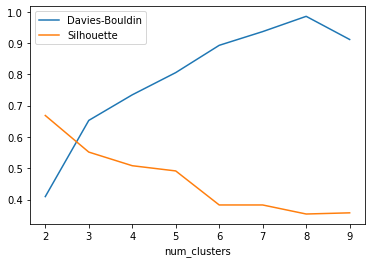

In [97]:
import matplotlib.pyplot as plt 

results.plot(x='num_clusters')
plt.show()

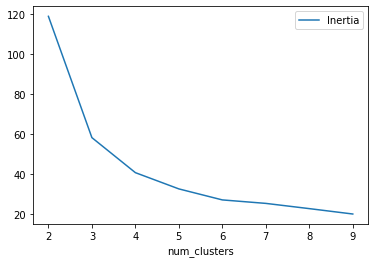

In [98]:
ind_3=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k,init='random').fit(X_train)
    labels = kmeans.labels_
    ind_3.append(kmeans.inertia_)
results=pd.DataFrame({'num_clusters':num_clusters,
                     'Inertia':ind_3})
results.plot(x='num_clusters')
plt.show()

In [99]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X_train)
y_pred=gm.predict(X_test)

In [100]:
pd.crosstab(y_test,y_pred,rownames=['true values'],colnames=['EM labels'])

EM labels,0,1,2
true values,,,
0,16,0,0
1,0,0,18
2,0,9,2


In [113]:
cost = -1.0*pd.crosstab(y_test,y_pred)
row_ind, col_ind = linear_sum_assignment(cost)
for i,j in enumerate(col_ind):
    print('Cluster Label : {0}, True Label : {1}'.format(i,j))

Cluster Label : 0, True Label : 0
Cluster Label : 1, True Label : 2
Cluster Label : 2, True Label : 1


In [108]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_train)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [114]:
import numpy as np

print("BGM active components: %d" % np.sum(bgm.weights_ > 0.01))

BGM active components: 3
